In [1]:
import os,shutil
original_dataset_dir_female = '/home/wangtingshen/tingshen-code/female/'
original_dataset_dir_male = '/home/wangtingshen/tingshen-code/male/'

In [2]:
#保存较小的数据集
base_dir = '/home/wangtingshen/tingshen-code/real-dataset'
os.mkdir(base_dir)

In [3]:
#拼接子路径，划分训练、验证、测试集
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [4]:
#训练女性图像目录
train_female_dir = os.path.join(train_dir,'female')
os.mkdir(train_female_dir)

In [5]:
#训练男性图像目录
train_male_dir = os.path.join(train_dir,'male')
os.mkdir(train_male_dir)

In [6]:
#验证女性图像目录
validation_female_dir = os.path.join(validation_dir,'female')
os.mkdir(validation_female_dir)

In [7]:
#验证男性图像目录
validation_male_dir = os.path.join(validation_dir,'male')
os.mkdir(validation_male_dir)

In [8]:
#测试女性图像目录
test_female_dir = os.path.join(test_dir,'female')
os.mkdir(test_female_dir)

In [9]:
#测试男性图像目录
test_male_dir = os.path.join(test_dir,'male')
os.mkdir(test_male_dir)

In [10]:
#将前70000张女性复制到train_female_dir
fnames = ['female.{}.jpg'.format(i+1) for i in range(70000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_female, fname)
    dst = os.path.join(train_female_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
#将前5000张女性复制到validation_female_dir
fnames = ['female.{}.jpg'.format(i+1) for i in range(70000,75000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_female, fname)
    dst = os.path.join(validation_female_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
#将前5000张女性复制到test_female_dir
fnames = ['female.{}.jpg'.format(i+1) for i in range(75000,80000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_female, fname)
    dst = os.path.join(test_female_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
#将前70000张男性复制到train_male_dir
fnames = ['male.{}.jpg'.format(i+1) for i in range(70000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_male, fname)
    dst = os.path.join(train_male_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
#将前5000张男性复制到validation_male_dir
fnames = ['male.{}.jpg'.format(i+1) for i in range(70000,75000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_male, fname)
    dst = os.path.join(validation_male_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
#将前5000张男性复制到test_male_dir
fnames = ['male.{}.jpg'.format(i+1) for i in range(75000,80000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_male, fname)
    dst = os.path.join(test_male_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
print('total training female images:',len(os.listdir(train_female_dir)))
print('total training male images:',len(os.listdir(train_male_dir)))
print('total validation female images:',len(os.listdir(validation_female_dir)))
print('total validation male images:',len(os.listdir(validation_male_dir)))
print('total test female images:',len(os.listdir(test_female_dir)))
print('total test male images:',len(os.listdir(test_male_dir)))

total training female images: 70000
total training male images: 70000
total validation female images: 5000
total validation male images: 5000
total test female images: 5000
total test male images: 5000


In [17]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#默认打乱数据
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224,224),
        batch_size=35,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224,224),
        batch_size=35,
        class_mode='binary')

Found 140000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (35, 224, 224, 3)
labels batch shape: (35,)


In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras.utils import plot_model

# 定义输入
input_shape = (224,224,3) # RGB影像224x224（height,width,channel)

model = models.Sequential()
# 第1个卷积区块(block1)
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=input_shape,name='block1_conv1'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu',name='block1_conv2'))
model.add(MaxPool2D((2,2),strides=(2,2),name='block1_pool'))

# 第2个卷积区块(block2)
model.add(Conv2D(128,(3,3),padding='same',activation='relu',name='block2_conv1'))
model.add(Conv2D(128,(3,3),padding='same',activation='relu',name='block2_conv2'))
model.add(MaxPool2D((2,2),strides=(2,2),name='block2_pool'))

# 第3个区块(block3)
model.add(Conv2D(256,(3,3),padding='same',activation='relu',name='block3_conv1'))
model.add(Conv2D(256,(3,3),padding='same',activation='relu',name='block3_conv2'))
model.add(Conv2D(256,(3,3),padding='same',activation='relu',name='block3_conv3'))
model.add(MaxPool2D((2,2),strides=(2,2),name='block3_pool'))

# 第4个区块(block4)
model.add(Conv2D(512,(3,3),padding='same',activation='relu',name='block4_conv1'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu',name='block4_conv2'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu',name='block4_conv3'))
model.add(MaxPool2D((2,2),strides=(2,2),name='block4_pool'))

# 第5个区块(block5)
model.add(Conv2D(512,(3,3),padding='same',activation='relu',name='block5_conv1'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu',name='block5_conv2'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu',name='block5_conv3'))
model.add(MaxPool2D((2,2),strides=(2,2),name='block5_pool'))

# 前馈全连接区块
model.add(Flatten(name='flatten'))
model.add(Dense(4096,activation='relu',name='fc1'))
model.add(Dense(4096,activation='relu',name='fc2'))
model.add(Dense(1,activation='sigmoid',name='predictions'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [26]:
from keras import optimizers
from keras.callbacks import LearningRateScheduler
import math

def step_decay(epoch):
    initial_lr = 1e-4
    drop = 0.1
    epochs_drop = 15.0
    lrate = initial_lr*math.pow(drop,math.floor((1+epoch)/epochs_drop))
    return lrate

learning_rate = LearningRateScheduler(step_decay)
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [27]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000, #每个step表示1个batch_size的数据大小
        epochs=200,
        validation_data=validation_generator,
        callbacks=[learning_rate],
        validation_steps=50)

Epoch 1/200
2000/2000 [==============================] - 506s 253ms/step - loss: 0.2617 - acc: 0.8834 - val_loss: 0.1048 - val_acc: 0.9640
Epoch 2/200
2000/2000 [==============================] - 504s 252ms/step - loss: 0.1123 - acc: 0.9595 - val_loss: 0.0849 - val_acc: 0.9657
Epoch 3/200
2000/2000 [==============================] - 506s 253ms/step - loss: 0.0986 - acc: 0.9666 - val_loss: 0.0997 - val_acc: 0.9726
Epoch 4/200
2000/2000 [==============================] - 508s 254ms/step - loss: 0.0884 - acc: 0.9704 - val_loss: 0.2410 - val_acc: 0.9680
Epoch 5/200
2000/2000 [==============================] - 510s 255ms/step - loss: 0.0832 - acc: 0.9729 - val_loss: 0.1106 - val_acc: 0.9674
Epoch 6/200
2000/2000 [==============================] - 514s 257ms/step - loss: 0.0833 - acc: 0.9727 - val_loss: 0.0731 - val_acc: 0.9713
Epoch 7/200
2000/2000 [==============================] - 513s 256ms/step - loss: 0.0768 - acc: 0.9754 - val_loss: 0.3474 - val_acc: 0.9703
Epoch 8/200
2000/2000 [====

2000/2000 [==============================] - 496s 248ms/step - loss: 0.0170 - acc: 0.9960 - val_loss: 0.0626 - val_acc: 0.9777
Epoch 118/200
2000/2000 [==============================] - 496s 248ms/step - loss: 0.0151 - acc: 0.9960 - val_loss: 0.0010 - val_acc: 0.9800
Epoch 119/200
2000/2000 [==============================] - 496s 248ms/step - loss: 0.0177 - acc: 0.9958 - val_loss: 9.4924e-04 - val_acc: 0.9737
Epoch 120/200
2000/2000 [==============================] - 496s 248ms/step - loss: 0.0143 - acc: 0.9962 - val_loss: 0.2983 - val_acc: 0.9829
Epoch 121/200
2000/2000 [==============================] - 496s 248ms/step - loss: 0.0173 - acc: 0.9956 - val_loss: 0.0785 - val_acc: 0.9805
Epoch 122/200
2000/2000 [==============================] - 497s 249ms/step - loss: 0.0147 - acc: 0.9964 - val_loss: 7.2966e-04 - val_acc: 0.9811
Epoch 123/200
2000/2000 [==============================] - 510s 255ms/step - loss: 0.0153 - acc: 0.9960 - val_loss: 0.0797 - val_acc: 0.9783
Epoch 124/200
2000/

Epoch 175/200
2000/2000 [==============================] - 497s 248ms/step - loss: 0.0163 - acc: 0.9960 - val_loss: 0.0354 - val_acc: 0.9794
Epoch 176/200
2000/2000 [==============================] - 497s 248ms/step - loss: 0.0157 - acc: 0.9960 - val_loss: 0.1245 - val_acc: 0.9766
Epoch 177/200
2000/2000 [==============================] - 497s 248ms/step - loss: 0.0165 - acc: 0.9959 - val_loss: 4.7717e-04 - val_acc: 0.9794
Epoch 178/200
2000/2000 [==============================] - 496s 248ms/step - loss: 0.0155 - acc: 0.9961 - val_loss: 0.0231 - val_acc: 0.9787
Epoch 179/200
2000/2000 [==============================] - 497s 248ms/step - loss: 0.0170 - acc: 0.9957 - val_loss: 0.0220 - val_acc: 0.9817
Epoch 180/200
2000/2000 [==============================] - 497s 248ms/step - loss: 0.0151 - acc: 0.9963 - val_loss: 0.0042 - val_acc: 0.9754
Epoch 181/200
2000/2000 [==============================] - 496s 248ms/step - loss: 0.0157 - acc: 0.9960 - val_loss: 0.2023 - val_acc: 0.9731
Epoch 182

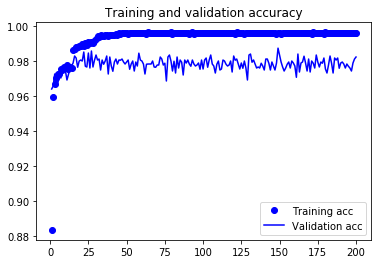

In [30]:
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

acc = history.history['acc']
val_acc =  history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

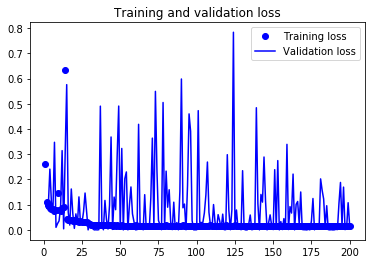

In [31]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()